# Make Predictions with Linear Regression

This recipe shows how to perform linear regression on my data. You can either play around using the provided data or you can load your own data and make the necessary changes in `input_cols` and `output_col`. For the linear regression itself, I used the `LinearRegression` functionality from the `scikit-learn` package.

In first step I imported necessary libraries for data analysis and modeling. numpy and pandas are fundamental for data handling, sklearn provides tools for machine learning tasks like model splitting and evaluation, and matplotlib and seaborn are used for visualizing data. This setup is crucial as it provides the foundational tools required for any data analysis, especially for tasks involving linear regression.

In [32]:
# Load packages
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In this step I loaded the dataset from a CSV file into a DataFrame using pandas. The displayed data provides an initial look at the dataset's structure and the types of variables included. This step is crucial for understanding the data I will be working with and for making informed decisions in the subsequent stages of data processing and model building.

In [10]:
# Load data from the csv file
df = pd.read_csv("housing_data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The output displays the first few rows of the loaded dataset, which appears to be related to housing data. The dataset includes various features like crime rate (CRIM), residential land zoned (ZN), industrial proportion (INDUS), nitric oxide concentration (NOX), average number of rooms per dwelling (RM), and others, along with the target variable PRICE.

The initial data overview indicates a mix of continuous and categorical variables, commonly found in housing datasets. Variables like RM, AGE, and LSTAT are continuous, while CHAS (Charles River dummy variable) is categorical. The target variable PRICE reflects the property's price, which is the main focus of the linear regression model. This snapshot is invaluable for understanding data distribution, potential feature relationships, and preliminary data quality assessment.

In [11]:
# Understand the variables
pd.options.display.max_colwidth = 100
pd.read_csv('variable_explanation.csv', index_col=0)

,Explanation
Variable,
CRIM,The crime rate per capita
ZN,The proportion of residential land zoned for lots over 25000 sq.ft
INDUS,The proportion of non-retail business acres per town
CHAS,The Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX,The nitric oxides concentration (parts per 10 million)
RM,The average number of rooms per dwelling
AGE,The proportion of owner-occupied units built prior to 1940
DIS,The weighted distances to five Boston employment centres
RAD,The index of accessibility to radial highways


Understanding what each variable represents allows for a more informed approach to data analysis and modeling. 

Knowing the meaning behind each variable aids in interpreting the results of the linear regression model and understanding how different features might influence the housing prices (TARGET). This step is vital for any data analysis project as it grounds the technical analysis in the real-world context of the data.

Next step is a crucial step in the machine learning workflow. 

It involves:
Selecting Features and Target: The chosen input features (input_cols) cover a range of variables that are likely to influence the house prices. This selection is essential for building a model that can effectively learn from these features.

Splitting Data: The data is divided into training and test sets, with 30% of the data reserved for testing. This split is important for training the model on a subset of the data (training set) and then evaluating its performance on unseen data (test set).

Random State: Setting a random_state ensures reproducibility of the results. It's important for consistent model evaluation, especially when sharing the analysis or comparing model performance across different runs.

By properly splitting the data, you ensure that the model can be trained and validated effectively, leading to more reliable predictions.

In [12]:
# Split the data into X and y
# You can adapt the input and output columns to fit your own data
input_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
output_col = ['PRICE']
X = df[input_cols]
y = df[output_col]

# Split the data into training and test data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 44)

The pair plots that visualize the relationship between each input variable and the target variable PRICE. Pair plots are scatter plots that help identify trends, patterns, and potential correlations between the features and the target.

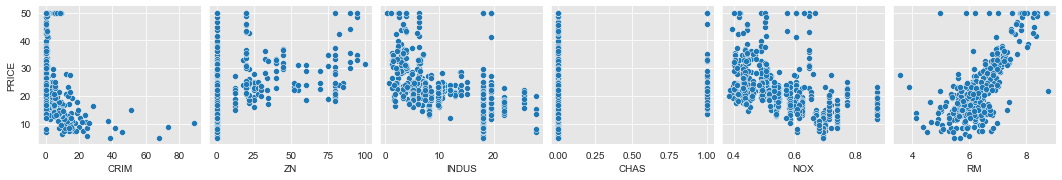

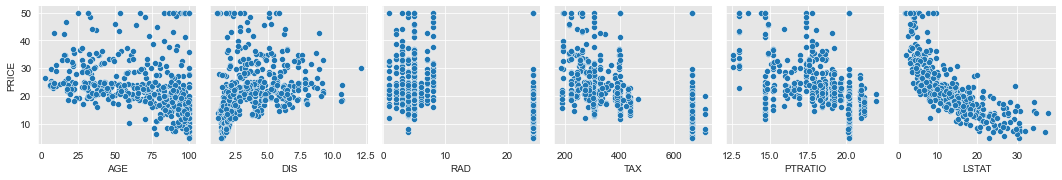

In [27]:
# Make two figures so it is better visualized
half = len(input_cols)//2

fig1=sns.pairplot(
    df,
    x_vars=input_cols[:half],
    y_vars=output_col
)

fig2=sns.pairplot(
    df,
    x_vars=input_cols[half:],
    y_vars=output_col
)

These visualizations are very useful for several reasons:

Initial Insights: They offer immediate visual insights into the relationship between the house prices and each of the predictor variables. For instance, the number of rooms (RM) seems to show a positive correlation with PRICE, as one might expect.

Outlier Detection: The plots can help identify outliers or unusual data points that might affect the performance of the linear regression model.

Linearity Check: Linear regression assumes a linear relationship between the predictors and the target variable. These plots can help verify this assumption.

Splitting Variables: The decision to split the variables into two figures aids in reducing clutter and improving readability of the plots.

Observations from these plots can guide the feature engineering process, influence the choice of model, and highlight the need for potential data transformations or outlier treatment.

In [14]:
# Function to flatten 2D lists so it can be used by plotly
def flatten(l):
    return [item for sublist in l for item in sublist]

# Set up and fit the linear regressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Flatten the prediction and expected lists
predicted = flatten(lin_reg.predict(X_test))
expected = flatten(y_test.values)

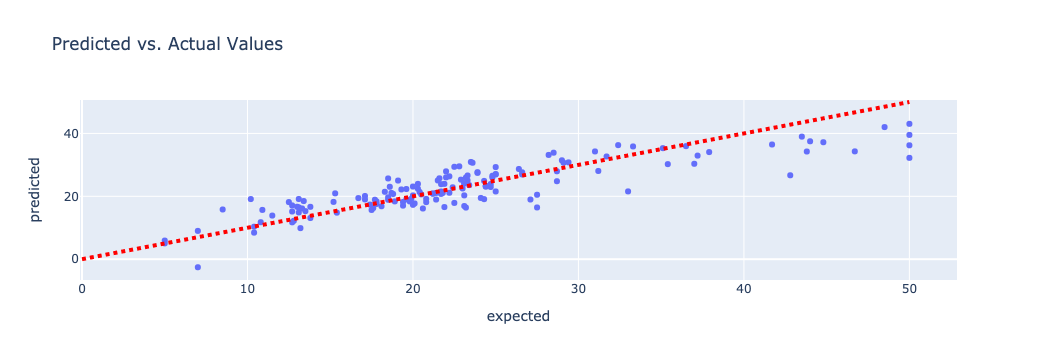

In [36]:
%matplotlib inline
# Import plotting package
import plotly.express as px

# Put data to plot in dataframe
df_plot = pd.DataFrame({'expected':expected, 'predicted':predicted})

# Make scatter plot from data
fig = px.scatter(
    df_plot, 
    x='expected', 
    y='predicted',
    title='Predicted vs. Actual Values')

# Add straight line indicating perfect model
fig.add_shape(type="line",
    x0=0, y0=0, x1=50, y1=50,
    line=dict(
        color="Red",
        width=4,
        dash="dot",
    )
)

# Show figure
fig.show()

1 It is a scatter plot comparing the predicted values from the linear regression model to the actual values. A diagonal line (red dotted) represents the points where the predicted value equals the actual value, which would be the indication of a perfect model.

The scatter plot shows how well the model's predictions align with the actual values:

Correlation: There appears to be a good positive correlation between the predicted and actual values, suggesting the model has learned the general trend from the data.

Perfect Prediction Line: The red dotted line represents where the predicted values exactly match the actual values. Points along this line are perfect predictions. The closeness of the data points to this line indicates the accuracy of the model.

Model Performance: While many points are near the line, indicating accurate predictions, there are also points that deviate from the line, which suggests prediction errors.

Potential Improvements: The areas where the points significantly stray from the line may indicate where the model could be improved, possibly through feature engineering, hyperparameter tuning, or trying more complex models.

Outliers: The plot could also help in identifying outliers or leverage points that have a significant impact on the model, which might need further investigation.

In [33]:
# Print the root mean square error (RMS)
error = np.sqrt(np.mean((np.array(predicted) - np.array(expected)) ** 2))
print(f"RMS: {error:.4f} ")

r2=r2_score(expected, predicted)
print(f"R2: {round(r2,4)}") 

RMS: 4.6650 
R2: 0.7495


These metrics give us a quantitative measure of the model's performance:

RMS Error: The RMS error of 4.6650 indicates that the model's predictions are, on average, within approximately 4.6650 units of the actual housing prices. The lower the RMS error, the better the model's predictions. Given the scale of housing prices, this error could be considered reasonable, but it's context-dependent.

R-Squared: The R2 score of 0.7495 means that approximately 74.95% of the variance in the housing prices is explained by the model's inputs. An R2 score of 1 indicates perfect prediction, so 0.7495 is quite respectable, showing that the model has a good fit to the data.

Summary:

The project successfully applied linear regression to predict housing prices with a structured and methodical approach. 

The key steps included:

Loading and understanding the dataset.
Preparing the data by selecting relevant features and splitting into training and test sets.
Visualizing relationships between features and the target variable to gain insights.
Fitting a linear regression model and making predictions.
Evaluating the model using visualization of predictions vs. actual values and quantitative metrics.
The visual evaluation showed that the model's predictions generally agree with the actual values, although there are deviations, especially for higher values. The RMS error quantifies the average deviation of the predictions, and the R2 score reflects the proportion of variance captured by the model.

The model's R2 score is strong, explaining a substantial portion of the variance in housing prices. However, the RMS error suggests that there is still some prediction error. This could potentially be reduced by exploring more complex models, conducting feature engineering, or applying different data preprocessing techniques.

In conclusion, the project's linear regression model is a solid baseline and performs well, but there is room for further refinement to improve prediction accuracy. These improvements could include model tuning, exploring non-linear relationships, or adding more data if available.